In [2]:
import pandas as pd

In [26]:
data1 = pd.read_csv("/Users/Jaron/Desktop/INST414 Files/exit_velocity.csv")
data2 = pd.read_csv("/Users/Jaron/Desktop/INST414 Files/stats.csv")

df = data1.merge(data2, how = "left", on = ["player_id", 'last_name, first_name'])

In [67]:
df.head()

In [28]:
df = df[['last_name, first_name', 'avg_hit_angle', 'max_hit_speed', 'avg_hit_speed', 'brl_percent', 'k_percent',
        'bb_percent', 'z_swing_percent', 'oz_swing_percent', 'iz_contact_percent']]

df = df.set_index('last_name, first_name')

df = df.dropna()

df.head()

,avg_hit_angle,max_hit_speed,avg_hit_speed,brl_percent,k_percent,bb_percent,z_swing_percent,oz_swing_percent,iz_contact_percent
"last_name, first_name",,,,,,,,,
"Kwan, Steven",10.7,105.2,86.0,1.1,10.4,9.7,59.0,21.3,93.6
"Semien, Marcus",19.1,108.6,88.4,6.5,14.6,9.6,72.9,21.4,88.4
"Acuña Jr., Ronald",7.4,121.2,94.7,15.3,11.4,10.9,70.7,22.6,85.6
"Arraez, Luis",11.5,104.0,88.3,3.5,5.5,5.7,68.6,31.8,93.8
"Ramírez, José",18.0,111.6,90.0,7.0,10.6,10.6,67.2,28.2,91.2


In [38]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Elbow Curve')

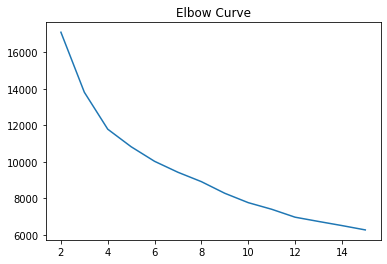

In [44]:
list = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(df)
    list.append(kmeans.inertia_)
    
plot = plt.figure
plt.plot(range(2, 16), list)
plt.title('Elbow Curve')

In [57]:
k = 4

cluster_model = KMeans(n_clusters = k)

In [58]:
cluster_model.fit(df)

KMeans(n_clusters=4)

In [59]:
cluster_labels = cluster_model.predict(df)

In [60]:
hitter_cluster_df = pd.DataFrame(cluster_labels, index = df.index, columns = ['cluster'])

In [61]:
hitter_cluster_df['cluster'].value_counts()

3    40
1    34
0    31
2    25
Name: cluster, dtype: int64

In [63]:
hitter_cluster_df[hitter_cluster_df['cluster'] == 0]

,cluster
"last_name, first_name",
"Turner, Trea",0
"Rodríguez, Julio",0
"Bichette, Bo",0
"Devers, Rafael",0
"Giménez, Andrés",0
"Abrams, CJ",0
"Peña, Jeremy",0
"Castellanos, Nick",0
"Santander, Anthony",0


In [64]:
hitter_cluster_df[hitter_cluster_df['cluster'] == 1]

,cluster
"last_name, first_name",
"Kwan, Steven",1
"Hoerner, Nico",1
"Bregman, Alex",1
"Stott, Bryson",1
"Rutschman, Adley",1
"Bogaerts, Xander",1
"Betts, Mookie",1
"Lowe, Nathaniel",1
"Thomas, Lane",1


In [65]:
hitter_cluster_df[hitter_cluster_df['cluster'] == 2]

,cluster
"last_name, first_name",
"Riley, Austin",2
"Olson, Matt",2
"Torkelson, Spencer",2
"Goldschmidt, Paul",2
"Happ, Ian",2
"Alonso, Pete",2
"Swanson, Dansby",2
"Henderson, Gunnar",2
"Arozarena, Randy",2


In [66]:
hitter_cluster_df[hitter_cluster_df['cluster'] == 3]

,cluster
"last_name, first_name",
"Semien, Marcus",3
"Acuña Jr., Ronald",3
"Arraez, Luis",3
"Ramírez, José",3
"Witt Jr., Bobby",3
"McNeil, Jeff",3
"Freeman, Freddie",3
"Guerrero Jr., Vladimir",3
"Torres, Gleyber",3
